[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]]


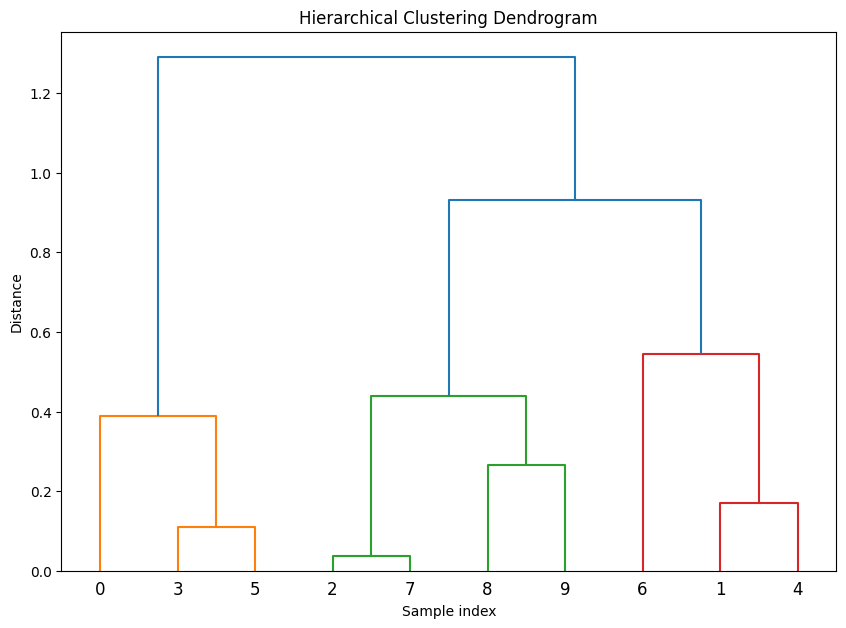

In [27]:
# ============================================================================
# Author: pf.zh
# Date: 2024-12-02
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 生成10个随机数据点
np.random.seed(42)
X = np.random.rand(10, 2)

print(X)
# 计算凝聚型层次聚类的链接矩阵
Z = linkage(X, method='ward')

# 绘制树状图
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [28]:
import numpy as np

# 计算欧几里得距离的函数
def calculate_distance(X):
    n = len(X)
    distances = np.zeros((n, n))  # 初始化二维距离矩阵
    for i in range(n):
        for j in range(i + 1, n):
            dist = np.linalg.norm(X[i] - X[j])  # 计算欧几里得距离
            distances[i, j] = dist
            distances[j, i] = dist  # 距离矩阵是对称的
    return distances

# 层次聚类算法
def agglomerative_clustering(X, k=3):
    n = len(X)
    distances = calculate_distance(X)  # 计算所有点之间的距离
    clusters = [[i] for i in range(n)]  # 每个点开始时是一个独立的簇
    merge_history = []  # 用于存储每次合并的信息
    
    # 在每次迭代中合并距离最小的两个簇
    while len(clusters) > k:
        min_dist = np.inf
        merge_clusters = None
        
        # 计算每对簇之间的距离
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                # 计算簇i和簇j之间的平均距离
                dist = np.mean([distances[p, q] for p in clusters[i] for q in clusters[j]])
                if dist < min_dist:
                    min_dist = dist
                    merge_clusters = (i, j)

        # 合并距离最小的两个簇
        cluster1, cluster2 = merge_clusters
        new_cluster = clusters[cluster1] + clusters[cluster2]
        clusters = [clusters[k] for k in range(len(clusters)) if k != cluster1 and k != cluster2]  # 移除已合并的簇
        clusters.append(new_cluster)  # 将合并的簇添加回簇列表
        
        # 记录每次合并的簇信息
        merge_history.append((cluster1, cluster2))
    
    # 打印字符风格的树状图
    print("Agglomerative Clustering Dendrogram (Character Style):")
    print_clusters(merge_history, len(X))

def print_clusters(merge_history, n):
    """
    根据合并历史打印字符风格的层次聚类树状图
    """
    # 初始化每个簇为一个独立的点
    clusters = [[i] for i in range(n)]
    
    for step, (c1, c2) in enumerate(merge_history):
        print(f"Step {step + 1}: Merged clusters {c1} and {c2}")
        # 打印当前簇的状态
        for i, cluster in enumerate(clusters):
            print(f"Cluster {i}: {cluster}")
        
        # 合并簇
        new_cluster = clusters[c1] + clusters[c2]
        clusters = [clusters[i] for i in range(len(clusters)) if i != c1 and i != c2]
        clusters.append(new_cluster)
        
        print("-" * 40)

# 生成一些随机数据点
np.random.seed(42)
X = np.random.rand(10, 2)  # 10个二维点

# 执行层次聚类，将数据聚成3个簇
agglomerative_clustering(X, k=3)

Agglomerative Clustering Dendrogram (Character Style):
Step 1: Merged clusters 2 and 7
Cluster 0: [0]
Cluster 1: [1]
Cluster 2: [2]
Cluster 3: [3]
Cluster 4: [4]
Cluster 5: [5]
Cluster 6: [6]
Cluster 7: [7]
Cluster 8: [8]
Cluster 9: [9]
----------------------------------------
Step 2: Merged clusters 2 and 4
Cluster 0: [0]
Cluster 1: [1]
Cluster 2: [3]
Cluster 3: [4]
Cluster 4: [5]
Cluster 5: [6]
Cluster 6: [8]
Cluster 7: [9]
Cluster 8: [2, 7]
----------------------------------------
Step 3: Merged clusters 1 and 2
Cluster 0: [0]
Cluster 1: [1]
Cluster 2: [4]
Cluster 3: [6]
Cluster 4: [8]
Cluster 5: [9]
Cluster 6: [2, 7]
Cluster 7: [3, 5]
----------------------------------------
Step 4: Merged clusters 2 and 3
Cluster 0: [0]
Cluster 1: [6]
Cluster 2: [8]
Cluster 3: [9]
Cluster 4: [2, 7]
Cluster 5: [3, 5]
Cluster 6: [1, 4]
----------------------------------------
Step 5: Merged clusters 2 and 5
Cluster 0: [0]
Cluster 1: [6]
Cluster 2: [2, 7]
Cluster 3: [3, 5]
Cluster 4: [1, 4]
Cluster 5